In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import nltk
import math
import string
import plotly
import re
import os
from matplotlib import gridspec
from scipy.sparse import hstack
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")




In [2]:
#load dataset
dat = pd.read_csv('wine.csv')
dat.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
dat.shape

(129971, 14)

In [4]:
# taking only relevant columns
dat = dat.loc[:,['description','designation','country','title','variety','price','winery']]
dat.shape


(129971, 7)

In [5]:
dat.isnull().any()


description    False
designation     True
country         True
title          False
variety         True
price           True
winery         False
dtype: bool

In [6]:
#finding count of null values in each columns
desi_count=dat.loc[dat['designation'].isnull()]
x=desi_count.shape[0]
x=x/129971*100
print('percentage of data points where designation is null is',x)
country_count=dat.loc[dat['country'].isnull()]
x=country_count.shape[0]
x=x/129971*100
print('percentage of data points where country is null is',x)
variety_count=dat.loc[dat['variety'].isnull()]
x=variety_count.shape[0]
x=x/129971*100
print('percentage of data points where variety is null is',x)
price_count=dat.loc[dat['price'].isnull()]
x=price_count.shape[0]
x=x/129971*100
print('percentage of data points where price is null is',x)

percentage of data points where designation is null is 28.825661109016625
percentage of data points where country is null is 0.04847235152457087
percentage of data points where variety is null is 0.0007694024051519185
percentage of data points where price is null is 6.921544036746659


In [7]:
#eliminate null values
dat=dat.loc[~dat['designation'].isnull()]
x=dat.shape[0]
x=x/129971*100
print('percentage of data remained after eliminating duplicates is ',x)


percentage of data remained after eliminating duplicates is  71.17433889098336


In [8]:
dat=dat.loc[~dat['country'].isnull()]
x=dat.shape[0]
x=x/129971*100
print('percentage of data remained after eliminating duplicates is ',x)


percentage of data remained after eliminating duplicates is  71.13432996591548


In [9]:
dat=dat.loc[~dat['price'].isnull()]
x=dat.shape[0]
x=x/129971*100
print('percentage of data remained after eliminating duplicates is ',x)


percentage of data remained after eliminating duplicates is  66.28247839902748


In [10]:
dat=dat.loc[~dat['variety'].isnull()]
x=dat.shape[0]
x=x/129971*100
print('percentage of data remained after eliminating duplicates is ',x)


percentage of data remained after eliminating duplicates is  66.28247839902748


In [11]:
dat.head(10)

,description,designation,country,title,variety,price,winery
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,15.0,Quinta dos Avidagos
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,US,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,13.0,St. Julian
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,65.0,Sweet Cheeks
5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,15.0,Tandem
6,"Here's a bright, informal red that opens with ...",Belsito,Italy,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,16.0,Terre di Giurfo
8,Savory dried thyme notes accent sunnier flavor...,Shine,Germany,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,12.0,Heinz Eifel
9,This has great depth of flavor with its fresh ...,Les Natures,France,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,27.0,Jean-Baptiste Adam
10,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,US,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,19.0,Kirkland Signature
15,Zesty orange peels and apple notes abound in t...,Devon,Germany,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,24.0,Richard Böcking
16,"Baked plum, molasses, balsamic vinegar and che...",Felix,Argentina,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,30.0,Felix Lavaque


In [12]:
#duplicate removal
dat.duplicated().any()



True

In [13]:
dup_des = dat.duplicated('description')
dup_des.head(10)



1     False
3     False
4     False
5     False
6     False
8     False
9     False
10    False
15    False
16    False
dtype: bool

In [14]:
dat=dat.loc[~dat['description'].duplicated()]
dat.head(10)
dat.shape

(79477, 7)

In [15]:

dat['description'].head(10)


1     This is ripe and fruity, a wine that is smooth...
3     Pineapple rind, lemon pith and orange blossom ...
4     Much like the regular bottling from 2012, this...
5     Blackberry and raspberry aromas show a typical...
6     Here's a bright, informal red that opens with ...
8     Savory dried thyme notes accent sunnier flavor...
9     This has great depth of flavor with its fresh ...
10    Soft, supple plum envelopes an oaky structure ...
15    Zesty orange peels and apple notes abound in t...
16    Baked plum, molasses, balsamic vinegar and che...
Name: description, dtype: object

In [16]:
dup_tit=dat['title'].duplicated()
dup_tit.head(10)
dat=dat.loc[~dat['title'].duplicated()]
dat.shape





(78708, 7)

In [17]:
dat['title'].head(10)

1         Quinta dos Avidagos 2011 Avidagos Red (Douro)
3     St. Julian 2013 Reserve Late Harvest Riesling ...
4     Sweet Cheeks 2012 Vintner's Reserve Wild Child...
5     Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...
6      Terre di Giurfo 2013 Belsito Frappato (Vittoria)
8     Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...
9     Jean-Baptiste Adam 2012 Les Natures Pinot Gris...
10    Kirkland Signature 2011 Mountain Cuvée Caberne...
15          Richard Böcking 2013 Devon Riesling (Mosel)
16           Felix Lavaque 2010 Felix Malbec (Cafayate)
Name: title, dtype: object

In [18]:
dat.shape

(78708, 7)

In [19]:
dat.sort_values(by=['variety'])
val_count=dat['variety'].value_counts()
val_count.tail(10)





Prunelard                 1
Molinara                  1
Viura-Verdejo             1
Ramisco                   1
Rebo                      1
Pinot Blanc-Pinot Noir    1
Francisa                  1
Other                     1
Riesling-Chardonnay       1
Madeira Blend             1
Name: variety, dtype: int64

In [20]:
dat['variety'].describe()

count          78708
unique           630
top       Pinot Noir
freq            8779
Name: variety, dtype: object

In [21]:
dat = dat.groupby('variety').filter(lambda x: len(x) >70)



In [22]:
dat['variety'].describe()

count          73305
unique            80
top       Pinot Noir
freq            8779
Name: variety, dtype: object

In [23]:
dat1= pd.DataFrame(dat['variety'])
dat1.columns = ['variety']
dat=dat.drop('variety',axis=1)
print(dat1.head())
print(dat.columns)

          variety
1  Portuguese Red
3        Riesling
4      Pinot Noir
8  Gewürztraminer
9      Pinot Gris
Index(['description', 'designation', 'country', 'title', 'price', 'winery'], dtype='object')


In [24]:
dat1.shape


(73305, 1)

In [25]:
Counter(dat1['variety'])

Counter({'Aglianico': 200,
         'Albariño': 199,
         'Alvarinho': 74,
         'Barbera': 357,
         'Blaufränkisch': 127,
         'Bordeaux-style Red Blend': 2692,
         'Bordeaux-style White Blend': 226,
         'Cabernet Franc': 725,
         'Cabernet Sauvignon': 5350,
         'Cabernet Sauvignon-Merlot': 82,
         'Cabernet Sauvignon-Syrah': 81,
         'Carmenère': 458,
         'Champagne Blend': 953,
         'Chardonnay': 6757,
         'Chenin Blanc': 345,
         'Corvina, Rondinella, Molinara': 296,
         'Dolcetto': 83,
         'G-S-M': 138,
         'Gamay': 537,
         'Garganega': 160,
         'Garnacha': 234,
         'Gewürztraminer': 612,
         'Glera': 494,
         'Grenache': 439,
         'Grenache Blanc': 72,
         'Grüner Veltliner': 896,
         'Malbec': 1813,
         'Melon': 213,
         'Mencía': 110,
         'Meritage': 125,
         'Merlot': 1491,
         'Monastrell': 100,
         'Montepulciano': 136,
        

In [26]:
dat1['variety'] = dat1['variety'].astype('category')
categ_col = dat1.select_dtypes(['category']).columns
dat1[categ_col] = dat1[categ_col].apply(lambda x: x.cat.codes)
Counter(dat1['variety'])

Counter({0: 200,
         1: 199,
         2: 74,
         3: 357,
         4: 127,
         5: 2692,
         6: 226,
         7: 725,
         8: 5350,
         9: 82,
         10: 81,
         11: 458,
         12: 953,
         13: 6757,
         14: 345,
         15: 296,
         16: 83,
         17: 138,
         18: 537,
         19: 160,
         20: 234,
         21: 612,
         22: 494,
         23: 439,
         24: 72,
         25: 896,
         26: 1813,
         27: 213,
         28: 110,
         29: 125,
         30: 1491,
         31: 100,
         32: 136,
         33: 169,
         34: 135,
         35: 96,
         36: 1708,
         37: 95,
         38: 216,
         39: 159,
         40: 390,
         41: 82,
         42: 190,
         43: 339,
         44: 703,
         45: 102,
         46: 8779,
         47: 454,
         48: 1892,
         49: 841,
         50: 133,
         51: 162,
         52: 6503,
         53: 1071,
         54: 330,
         55: 3857,

In [27]:
dat.shape

(73305, 6)

In [28]:
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def pre_process(text, index, column):
    
        string = ""
        for words in text.split():
            # remove the special chars like"£$%@ etc
            word = ("".join(s for s in words if s.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        dat[column][index] = string

   

list of stop words: {'by', 'me', 'had', 'he', 'too', 'was', 'hers', 'from', 'all', 'some', 'd', 'him', 't', 'off', 'what', 'through', 'under', 'will', "haven't", 'of', 'can', 'don', 'own', 'out', 'if', "weren't", 'this', 'aren', 'do', 'why', 'didn', "wouldn't", 'these', 'doesn', 'them', 'once', 'because', 'll', 'so', 'which', 'or', "needn't", 'about', 'does', 'they', 'nor', 'she', 'my', 'not', "didn't", "won't", 'your', 'after', 'the', 'themselves', 'myself', 'is', 'did', 'yourselves', 'below', 'their', 'down', 'been', 'wasn', 'as', 'i', 'being', "she's", 'again', 'you', 'how', 'm', 'just', 'most', 'during', 've', 'weren', 'himself', 'needn', 'have', 'yours', 'o', "you'll", 'ourselves', "mustn't", "couldn't", 'above', 'doing', "shan't", 'more', 'those', 'here', "you're", 'hasn', 'but', 'yourself', "shouldn't", 'were', "don't", 'where', 'there', 'very', 'now', 'his', 'wouldn', 'no', 'with', 'both', 'a', 'only', 's', 'ain', "hadn't", 'whom', "aren't", 'it', 'few', 'ma', "wasn't", 'should

In [29]:
for index, row in dat.iterrows():
    pre_process(row['description'], index, 'description')


In [30]:
dat['description'].head(10)

1     ripe fruity wine smooth still structured firm ...
3     pineapple rind lemon pith orange blossom start...
4     much like regular bottling 2012 comes across r...
8     savory dried thyme notes accent sunnier flavor...
9     great depth flavor fresh apple pear fruits tou...
10    soft supple plum envelopes oaky structure cabe...
15    zesty orange peels apple notes abound sprightl...
16    baked plum molasses balsamic vinegar cheesy oa...
17    raw blackcherry aromas direct simple good juic...
18    desiccated blackberry leather charred wood min...
Name: description, dtype: object

In [31]:
X_train, X_test, y_train, y_test = train_test_split(dat,dat1,test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train,X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2)


In [32]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(46915, 6)
(11729, 6)
(14661, 6)


In [33]:
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(46915, 1)
(11729, 1)
(14661, 1)


In [34]:
vectorizer = CountVectorizer()
train_description=vectorizer.fit(X_train['description'])
vector1=vectorizer.transform(X_train['description'])
test_description=vectorizer.transform(X_test['description'])

cv_description=vectorizer.transform(X_cv['description'])



In [35]:
vector1.shape

(46915, 30009)

In [36]:
test_description.shape

(14661, 30009)

In [37]:
cv_description.shape

(11729, 30009)

In [38]:
vector_tfidf=TfidfVectorizer()
vector_desc_train=vector_tfidf.fit_transform(X_train['description'])
vector_desc_test=vector_tfidf.transform(X_test['description'])
vector_desc_cv=vector_tfidf.transform(X_cv['description'])

In [39]:
vector_desc_train.shape

(46915, 30009)

For values of alpha =  1e-05 The accuracy  is: 0.605934009719
For values of alpha =  0.0001 The accuracy  is: 0.620257481456
For values of alpha =  0.001 The accuracy  is: 0.557165998806
For values of alpha =  0.01 The accuracy  is: 0.429618893341
For values of alpha =  0.1 The accuracy  is: 0.29286384176
For values of alpha =  1 The accuracy  is: 0.168045016625
For values of alpha =  10 The accuracy  is: 0.150822747037


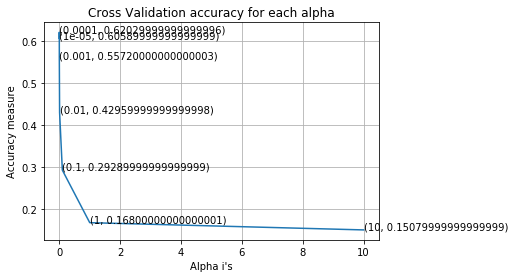

For values of best alpha =  0.0001 The train accuracy is: 0.787743791964
For values of best alpha =  0.0001 The cross validation accuracy is: 0.620257481456
For values of best alpha =  0.0001 The test accuracy is: 0.617079326103


In [40]:
#logistic regression for Bag Of Words
alpha = [10 ** x for x in range(-5, 2)]
accuracy_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(vector1, y_train)
    s_clf=CalibratedClassifierCV(clf,method="sigmoid")
    s_clf.fit(vector1,y_train)
   
    y_predict = s_clf.predict(cv_description) 
    accuracy_array.append(accuracy_score(y_cv, y_predict))
    print('For values of alpha = ', i, "The accuracy  is:",accuracy_score(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(alpha, accuracy_array)
for i, txt in enumerate(np.round(accuracy_array,4)):
    ax.annotate((alpha[i],np.round(txt,4)), (alpha[i],accuracy_array[i]))
plt.grid()
plt.title("Cross Validation accuracy for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Accuracy measure")
plt.show()

best_alpha = np.argmax(accuracy_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(vector1, y_train)
s_clf=CalibratedClassifierCV(clf,method="sigmoid")
s_clf.fit(vector1,y_train)
   

y_predict = s_clf.predict(vector1)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = s_clf.predict(cv_description)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = s_clf.predict(test_description)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))












For values of alpha =  1e-05 The accuracy  is: 0.641060618979
For values of alpha =  0.0001 The accuracy  is: 0.592377866826
For values of alpha =  0.001 The accuracy  is: 0.500724699463
For values of alpha =  0.01 The accuracy  is: 0.352459715236
For values of alpha =  0.1 The accuracy  is: 0.218432943985
For values of alpha =  1 The accuracy  is: 0.188166084065
For values of alpha =  10 The accuracy  is: 0.185352544974


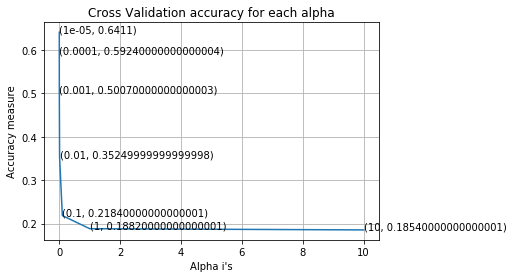

For values of best alpha =  1e-05 The train accuracy is: 0.770755621869
For values of best alpha =  1e-05 The cross validation accuracy is: 0.626055077159
For values of best alpha =  1e-05 The test accuracy is: 0.619534820271


In [41]:
#logistic regression for tfidf
alpha = [10 ** x for x in range(-5, 2)]
accuracy_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(vector_desc_train, y_train)
    s_clf=CalibratedClassifierCV(clf,method="sigmoid")
    s_clf.fit(vector_desc_train,y_train)
    y_predict = s_clf.predict(vector_desc_cv)
    
    accuracy_array.append(accuracy_score(y_cv, y_predict))
    print('For values of alpha = ', i, "The accuracy  is:",accuracy_score(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(alpha, accuracy_array)
for i, txt in enumerate(np.round(accuracy_array,4)):
    ax.annotate((alpha[i],np.round(txt,4)), (alpha[i],accuracy_array[i]))
plt.grid()
plt.title("Cross Validation accuracy for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Accuracy measure")
plt.show()

best_alpha = np.argmax(accuracy_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(vector_desc_train, y_train)
s_clf=CalibratedClassifierCV(clf,method="sigmoid")
s_clf.fit(vector_desc_train,y_train)

y_predict = clf.predict(vector_desc_train)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = clf.predict(vector_desc_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = clf.predict(vector_desc_test)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))





For values of alpha =  1e-05 The accuracy  is: 0.600733225339
For values of alpha =  0.0001 The accuracy  is: 0.62111006906
For values of alpha =  0.001 The accuracy  is: 0.613095745588
For values of alpha =  0.01 The accuracy  is: 0.492113564669
For values of alpha =  0.1 The accuracy  is: 0.323556995481
For values of alpha =  1 The accuracy  is: 0.152272145963
For values of alpha =  10 The accuracy  is: 0.149458606872


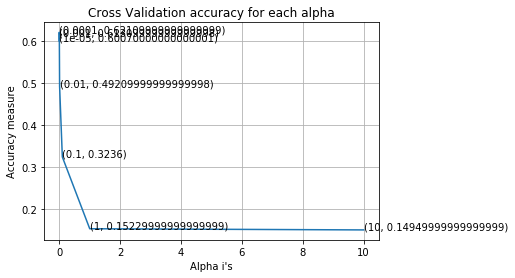

For values of best alpha =  0.0001 The train accuracy is: 0.835106042843
For values of best alpha =  0.0001 The cross validation accuracy is: 0.600562707818
For values of best alpha =  0.0001 The test accuracy is: 0.59600300116


In [42]:
#For Bag Of Words
alpha = [10 ** x for x in range(-5, 2)]
accuracy_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(vector1, y_train)
    s_clf=CalibratedClassifierCV(clf,method="sigmoid")
    s_clf.fit(vector1,y_train)
    y_predict=s_clf.predict(cv_description)
    accuracy_array.append(accuracy_score(y_cv, y_predict))
    print('For values of alpha = ', i, "The accuracy  is:",accuracy_score(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(alpha, accuracy_array)
for i, txt in enumerate(np.round(accuracy_array,4)):
    ax.annotate((alpha[i],np.round(txt,4)), (alpha[i],accuracy_array[i]))
plt.grid()
plt.title("Cross Validation accuracy for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Accuracy measure")
plt.show()

best_alpha = np.argmax(accuracy_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(vector1, y_train)
s_clf=CalibratedClassifierCV(clf,method="sigmoid")
s_clf.fit(vector1,y_train)
y_predict=s_clf.predict(vector1)


print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = clf.predict(cv_description)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = clf.predict(test_description)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))





For values of alpha =  1e-05 The accuracy  is: 0.433370278796
For values of alpha =  0.0001 The accuracy  is: 0.461079375906
For values of alpha =  0.001 The accuracy  is: 0.236337283656
For values of alpha =  0.01 The accuracy  is: 0.230028135391
For values of alpha =  0.1 The accuracy  is: 0.214511041009
For values of alpha =  1 The accuracy  is: 0.109813283315
For values of alpha =  10 The accuracy  is: 0.0896922158752


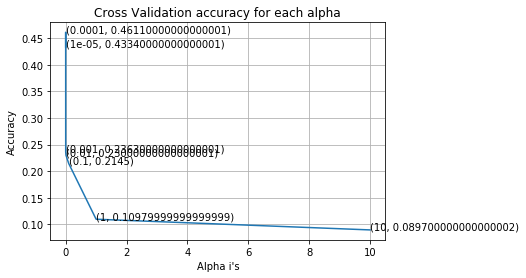

For values of best alpha =  0.0001 The train accuracy is: 0.786741980177
For values of best alpha =  0.0001 The cross validation accuracy is: 0.607724443687
For values of best alpha =  0.0001 The test accuracy is: 0.603233067321


In [43]:
#for tfidf
alpha = [10 ** x for x in range(-5, 2)]
accuracy_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(vector_desc_train, y_train)
    s_clf=CalibratedClassifierCV(clf,method="sigmoid")
    s_clf.fit(vector1,y_train)
    y_predict=s_clf.predict(vector_desc_cv)
    accuracy_array.append(accuracy_score(y_cv, y_predict))
    print('For values of alpha = ', i, "The accuracy  is:",accuracy_score(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(alpha, accuracy_array)
for i, txt in enumerate(np.round(accuracy_array,4)):
    ax.annotate((alpha[i],np.round(txt,4)), (alpha[i],accuracy_array[i]))
plt.grid()
plt.title("Cross Validation accuracy for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Accuracy")
plt.show()

best_alpha = np.argmax(accuracy_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(vector_desc_train, y_train)
s_clf=CalibratedClassifierCV(clf,method="sigmoid")
s_clf.fit(vector_desc_train,y_train)
y_predict=s_clf.predict(vector_desc_train)


print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = clf.predict(vector_desc_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = clf.predict(vector_desc_test)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))





For values of alpha =  1e-05 The accuracy  is: 0.598772273851
For values of alpha =  0.0001 The accuracy  is: 0.605251939637
For values of alpha =  0.001 The accuracy  is: 0.633557848069
For values of alpha =  0.01 The accuracy  is: 0.585471907238
For values of alpha =  0.1 The accuracy  is: 0.448546338136
For values of alpha =  1 The accuracy  is: 0.292437547958
For values of alpha =  10 The accuracy  is: 0.164378889931


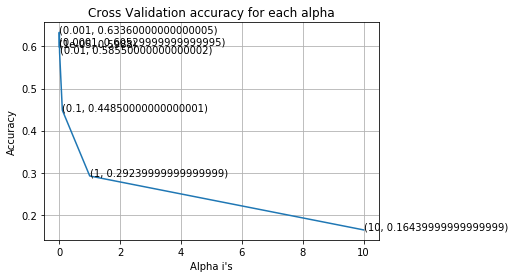

For values of best alpha =  0.001 The train accuracy is: 0.837578599595
For values of best alpha =  0.001 The cross validation accuracy is: 0.62119532782
For values of best alpha =  0.001 The test accuracy is: 0.619125571243


In [44]:
#For Bag Of Words
alpha = [10 ** x for x in range(-5, 2)]
accuracy_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='modified_huber', random_state=42)
    clf.fit(vector1, y_train)
    s_clf=CalibratedClassifierCV(clf,method="sigmoid")
    s_clf.fit(vector1,y_train)
    y_predict=s_clf.predict(cv_description)
    accuracy_array.append(accuracy_score(y_cv, y_predict))
    print('For values of alpha = ', i, "The accuracy  is:",accuracy_score(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(alpha, accuracy_array)
for i, txt in enumerate(np.round(accuracy_array,4)):
    ax.annotate((alpha[i],np.round(txt,4)), (alpha[i],accuracy_array[i]))
plt.grid()
plt.title("Cross Validation accuracy for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Accuracy")
plt.show()

best_alpha = np.argmax(accuracy_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='modified_huber', random_state=42)
clf.fit(vector1, y_train)
s_clf=CalibratedClassifierCV(clf,method="sigmoid")
s_clf.fit(vector1,y_train)
y_predict=s_clf.predict(vector1)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = clf.predict(cv_description)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = clf.predict(test_description)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))





For values of alpha =  1e-05 The accuracy  is: 0.61369255691
For values of alpha =  0.0001 The accuracy  is: 0.643618381789
For values of alpha =  0.001 The accuracy  is: 0.616420837241
For values of alpha =  0.01 The accuracy  is: 0.558444880211
For values of alpha =  0.1 The accuracy  is: 0.380083553585
For values of alpha =  1 The accuracy  is: 0.217324580101
For values of alpha =  10 The accuracy  is: 0.188677636627


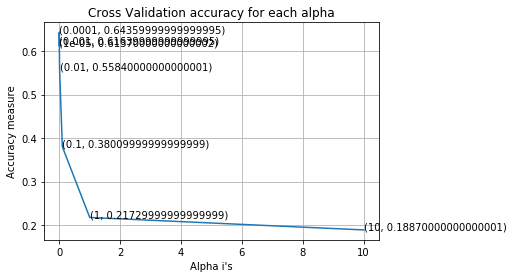

For values of best alpha =  0.0001 The train accuracy is: 0.868315037834
For values of best alpha =  0.0001 The cross validation accuracy is: 0.639525961293
For values of best alpha =  0.0001 The test accuracy is: 0.631744082941


In [45]:
#for tfidf
alpha = [10 ** x for x in range(-5, 2)]
accuracy_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='modified_huber', random_state=42)
    clf.fit(vector_desc_train, y_train)
    s_clf=CalibratedClassifierCV(clf,method="sigmoid")
    s_clf.fit(vector_desc_train,y_train)
    y_predict=s_clf.predict(vector_desc_cv)
    
   
    accuracy_array.append(accuracy_score(y_cv, y_predict))
    print('For values of alpha = ', i, "The accuracy  is:",accuracy_score(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(alpha, accuracy_array)
for i, txt in enumerate(np.round(accuracy_array,4)):
    ax.annotate((alpha[i],np.round(txt,4)), (alpha[i],accuracy_array[i]))
plt.grid()
plt.title("Cross Validation accuracy for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Accuracy measure")
plt.show()

best_alpha = np.argmax(accuracy_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='modified_huber', random_state=42)
clf.fit(vector_desc_train, y_train)
s_clf=CalibratedClassifierCV(clf,method="sigmoid")
s_clf.fit(vector_desc_train,y_train)

y_predict = s_clf.predict(vector_desc_train)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = clf.predict(vector_desc_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = clf.predict(vector_desc_test)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))





For values of alpha =  1e-05 The accuracy  is: 0.630062238895
For values of alpha =  0.0001 The accuracy  is: 0.607724443687
For values of alpha =  0.001 The accuracy  is: 0.570210589138
For values of alpha =  0.01 The accuracy  is: 0.572171540626
For values of alpha =  0.1 The accuracy  is: 0.314604825646
For values of alpha =  1 The accuracy  is: 0.0852587603376
For values of alpha =  10 The accuracy  is: 0.00417767925654


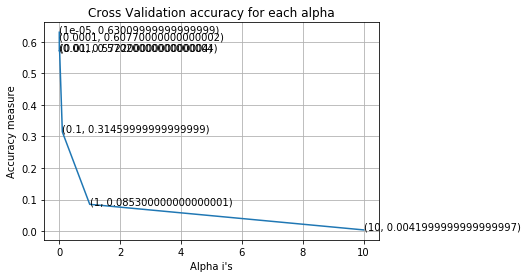

For values of best alpha =  1e-05 The train accuracy is: 0.885175317063
For values of best alpha =  1e-05 The cross validation accuracy is: 0.630062238895
For values of best alpha =  1e-05 The test accuracy is: 0.625537139349


In [46]:
#for tfidf
alpha = [10 ** x for x in range(-5, 2)]
accuracy_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(vector_desc_train, y_train)
    
    
    y_predict = clf.predict(vector_desc_cv)
    
    accuracy_array.append(accuracy_score(y_cv, y_predict))
    print('For values of alpha = ', i, "The accuracy  is:",accuracy_score(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(alpha, accuracy_array)
for i, txt in enumerate(np.round(accuracy_array,4)):
    ax.annotate((alpha[i],np.round(txt,4)), (alpha[i],accuracy_array[i]))
plt.grid()
plt.title("Cross Validation accuracy for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Accuracy measure")
plt.show()

best_alpha = np.argmax(accuracy_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(vector_desc_train, y_train)


y_predict = clf.predict(vector_desc_train)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = clf.predict(vector_desc_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = clf.predict(vector_desc_test)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))





for alpha = 1e-06
accuracy : 0.477022764089
for alpha = 1e-05
accuracy : 0.491260977065
for alpha = 0.0001
accuracy : 0.503879273595
for alpha = 0.001
accuracy : 0.519225850456
for alpha = 0.1
accuracy : 0.543268820871
for alpha = 1
accuracy : 0.45962997698
for alpha = 10
accuracy : 0.347088413334
for alpha = 100
accuracy : 0.334043823003
for alpha = 1000
accuracy : 0.336857362094


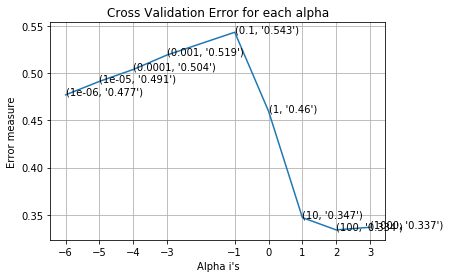

For values of best alpha =  0.1 The train accuracy is: 0.755131621017
For values of best alpha =  0.1 The cross validation accuracy is: 0.543268820871
For values of best alpha =  0.1 The test accuracy is: 0.540890798718


In [48]:
#naive_bayes for BoW
from sklearn.naive_bayes import MultinomialNB
alpha = [0.000001,0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
accu_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(vector1,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(vector1,y_train)
    sig_clf_pro = sig_clf.predict(cv_description)
    accu_array.append(accuracy_score(y_cv, sig_clf_pro))
   
    print("accuracy :",accuracy_score(y_cv, sig_clf_pro)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), accu_array)
for i, txt in enumerate(np.round(accu_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),accu_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmax(accu_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(vector1, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(vector1, y_train)


y_predict = sig_clf.predict(vector1)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = sig_clf.predict(cv_description)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = sig_clf.predict(test_description)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))

for alpha = 1e-06
accuracy : 0.451615653508
for alpha = 1e-05
accuracy : 0.463296103675
for alpha = 0.0001
accuracy : 0.478727939296
for alpha = 0.001
accuracy : 0.501918322108
for alpha = 0.1
accuracy : 0.510955750703
for alpha = 1
accuracy : 0.469861028221
for alpha = 10
accuracy : 0.458351095575
for alpha = 100
accuracy : 0.450251513343
for alpha = 1000
accuracy : 0.447523233012


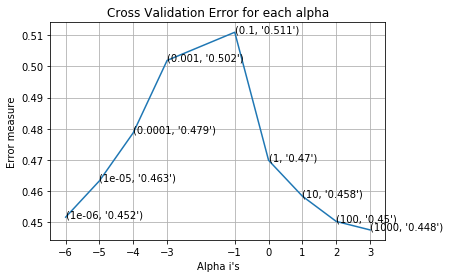

For values of best alpha =  0.1 The train accuracy is: 0.72232761377
For values of best alpha =  0.1 The cross validation accuracy is: 0.510955750703
For values of best alpha =  0.1 The test accuracy is: 0.513539322011


In [50]:
#naive_bayes for tfidf
from sklearn.naive_bayes import MultinomialNB
alpha = [0.000001,0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
accu_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(vector_desc_train,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(vector_desc_train,y_train)
    sig_clf_pro = sig_clf.predict(vector_desc_cv)
    accu_array.append(accuracy_score(y_cv, sig_clf_pro))
   
    print("accuracy :",accuracy_score(y_cv, sig_clf_pro)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), accu_array)
for i, txt in enumerate(np.round(accu_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),accu_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmax(accu_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(vector_desc_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(vector_desc_train, y_train)


y_predict = sig_clf.predict(vector_desc_train)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, y_predict))
y_predict = sig_clf.predict(vector_desc_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation accuracy is:",accuracy_score(y_cv, y_predict))
y_predict = sig_clf.predict(vector_desc_test)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, y_predict))